In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./resources/smsspamcollection.tsv', sep='\t')
print(df.head())

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2


In [3]:
temp_df  = pd.DataFrame({'length':df['length'],'punct':df['punct']},index=df.index)
print(temp_df)

      length  punct
0        111      9
1         29      6
2        155      6
3         49      6
4         61      2
...      ...    ...
5567     160      8
5568      36      1
5569      57      7
5570     125      1
5571      26      1

[5572 rows x 2 columns]


<Axes: >

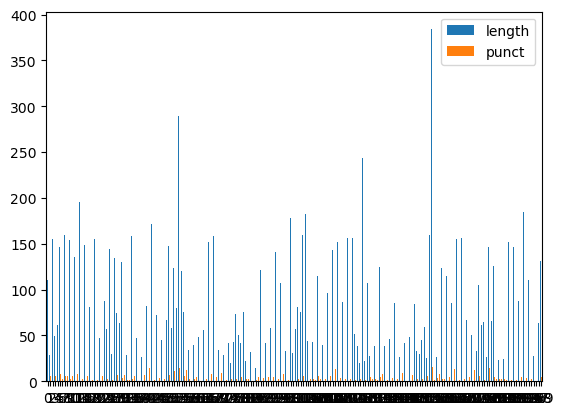

In [4]:
temp_df.head(200).plot.bar(rot=0)

In [5]:
import matplotlib.pyplot as plt

[]

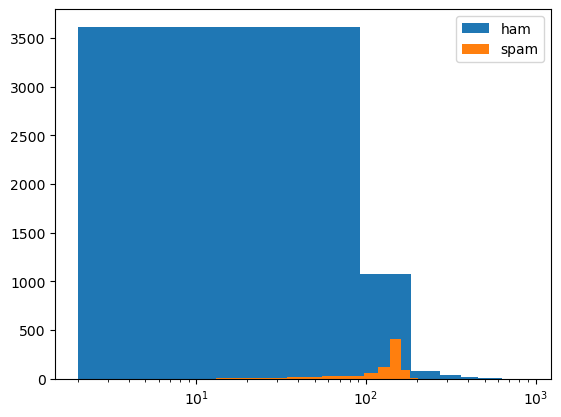

In [6]:
plt.xscale('log')
plt.hist(df[df['label']=='ham']['length'])
plt.hist(df[df['label']=='spam']['length'])
plt.legend(('ham','spam'))
plt.plot()

[]

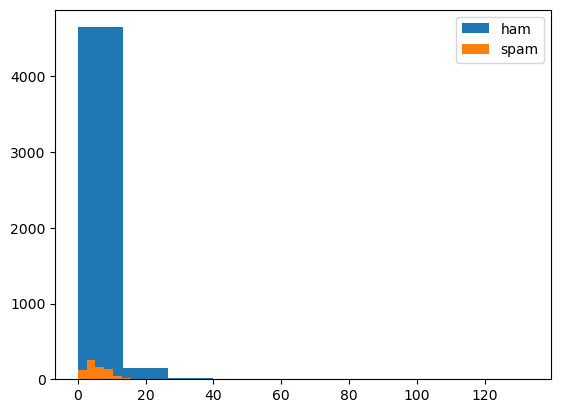

In [7]:
plt.hist(df[df['label']=='ham']['punct'])
plt.hist(df[df['label']=='spam']['punct'])
plt.legend(('ham','spam'))
plt.plot()

In [8]:
import spacy;
nlp = spacy.load('en_core_web_lg')
df['doc'] = [nlp(message) for message in df['message']]

In [9]:
def punct_per_words(row):
    if(row['punct'] == 0):
        return 0;
    else:
        return round(len(row['doc']) / row['punct']);

df['punct_per_words'] = df.apply(punct_per_words, axis=1) 

# df['punct_per_words'] = ppw
# print(df.head())

[]

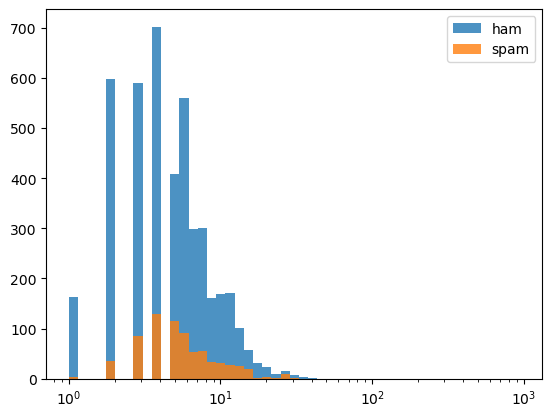

In [10]:

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct_per_words'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct_per_words'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.plot()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = df[['length','punct','punct_per_words']]
y = df['label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [26]:
X_train,X_test, y_train,y_test = train_test_split(X,y_encoded,test_size = 0.2,random_state=1);
print(X_train,X_test, y_train,y_test)

      length  punct  punct_per_words
1642     136      8                5
2899      43      1               11
480       81      2                8
3485     165     14                3
157       27      4                2
...      ...    ...              ...
905       84      2                8
5192      69      9                2
3980      73      4                4
235      157      8                5
5157      23      3                3

[4457 rows x 3 columns]       length  punct  punct_per_words
1078      28      1                6
4028      45      3                4
958       26      0                0
4642       7      1                3
4674     107      8                4
...      ...    ...              ...
324      157      6                6
1163     155      6                5
86       121      4                8
4214      32      1                7
90        58      3                4

[1115 rows x 3 columns] [0 0 0 ... 0 1 0] [0 0 0 ... 0 0 0]


In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [15]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(y_predict)
y_pred_original = label_encoder.inverse_transform(np.round(y_predict).astype(int))
y_test_original = label_encoder.inverse_transform(np.round(y_test).astype(int))
print(y_pred_original)


[0.02277956 0.05316046 0.07083809 ... 0.24998356 0.02923897 0.09403126]
['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [17]:
from sklearn import metrics
# Print a confusion matrix
print(metrics.confusion_matrix(y_test_original,y_pred_original))
print(metrics.classification_report(y_test_original,y_pred_original))

[[951  17]
 [147   0]]
              precision    recall  f1-score   support

         ham       0.87      0.98      0.92       968
        spam       0.00      0.00      0.00       147

    accuracy                           0.85      1115
   macro avg       0.43      0.49      0.46      1115
weighted avg       0.75      0.85      0.80      1115



In [28]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)
y_pred_original = label_encoder.inverse_transform(np.round(y_predict).astype(int))
y_test_original = label_encoder.inverse_transform(np.round(y_test).astype(int))
print(metrics.confusion_matrix(y_test_original,y_pred_original))
print(metrics.classification_report(y_test_original,y_pred_original))
print(metrics.accuracy_score(y_test_original,y_pred_original))

[[909  59]
 [ 64  83]]
              precision    recall  f1-score   support

         ham       0.93      0.94      0.94       968
        spam       0.58      0.56      0.57       147

    accuracy                           0.89      1115
   macro avg       0.76      0.75      0.76      1115
weighted avg       0.89      0.89      0.89      1115

0.8896860986547085


In [32]:
from sklearn.linear_model import LogisticRegression
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1);
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [33]:
from sklearn import metrics
# Print a confusion matrix
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

[[939  29]
 [144   3]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92       968
        spam       0.09      0.02      0.03       147

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.47      1115
weighted avg       0.77      0.84      0.80      1115

0.8448430493273542


In [30]:
from sklearn.linear_model import LogisticRegression
X_train,X_test, y_train,y_test = train_test_split(X[['length','punct']],y,test_size = 0.2,random_state=1);
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)
y_predict = lr_model.predict(X_test)

In [31]:
from sklearn import metrics
# Print a confusion matrix
print(metrics.confusion_matrix(y_test,y_predict))
print(metrics.classification_report(y_test,y_predict))
print(metrics.accuracy_score(y_test,y_predict))

[[939  29]
 [144   3]]
              precision    recall  f1-score   support

         ham       0.87      0.97      0.92       968
        spam       0.09      0.02      0.03       147

    accuracy                           0.84      1115
   macro avg       0.48      0.50      0.47      1115
weighted avg       0.77      0.84      0.80      1115

0.8448430493273542
